In [1]:
import pandas as pd;
df=pd.read_csv("C:\\Users\\HP\\Downloads\\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
cols=["PassengerId","Name","Ticket","Fare","Cabin"]
df=df.drop(cols,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [4]:
x=round(df["Age"].mean(),2)
print(x)

29.7


In [5]:
mean_age=round(df["Age"].mean(),2)
mean_age

29.7

In [6]:
df["Age"]=df["Age"].fillna(mean_age)

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [9]:
df.shape

(889, 7)

In [10]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df["Sex"]=enc.fit_transform(df["Sex"])
df["Embarked"]=enc.fit_transform(df["Embarked"])

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [12]:
Y=df["Survived"]
X=df.drop("Survived",axis=1)

In [13]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [14]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2
...,...,...,...,...,...,...
886,2,1,27.0,0,0,2
887,1,0,19.0,0,0,2
888,3,0,29.7,1,2,2
889,1,1,26.0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [16]:
print('shape of x_train=',x_train.shape)
print('shape of y_train=',y_train.shape)
print('shape of x_test=',x_test.shape)
print('shape of y_test=',y_test.shape)

shape of x_train= (711, 6)
shape of y_train= (711,)
shape of x_test= (178, 6)
shape of y_test= (178,)


In [17]:
from sklearn.linear_model import LogisticRegression
lg_re=LogisticRegression()
lg_re.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred=lg_re.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [19]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix


array([[91, 14],
       [15, 58]], dtype=int64)

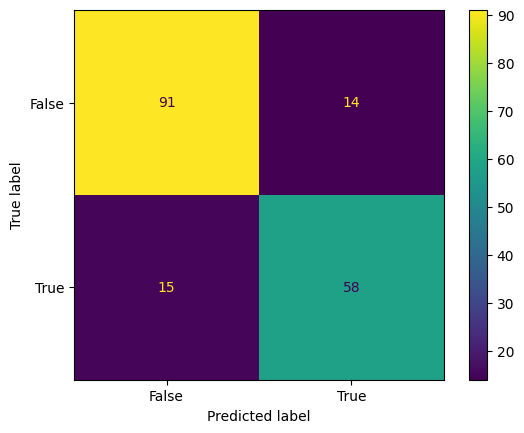

In [20]:
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [21]:
lr_Accuracy = metrics.accuracy_score(y_test, y_pred)
print(lr_Accuracy)
lr_Precision = metrics.precision_score(y_test, y_pred)
print(lr_Precision)
lr_Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(lr_Sensitivity_recall)
lr_F1_score = metrics.f1_score(y_test, y_pred)
print(lr_F1_score)

0.8370786516853933
0.8055555555555556
0.7945205479452054
0.8


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier= KNeighborsClassifier(n_neighbors=3)
knnclassifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y_pred_knn=knnclassifier.predict(x_test)
y_pred_knn

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

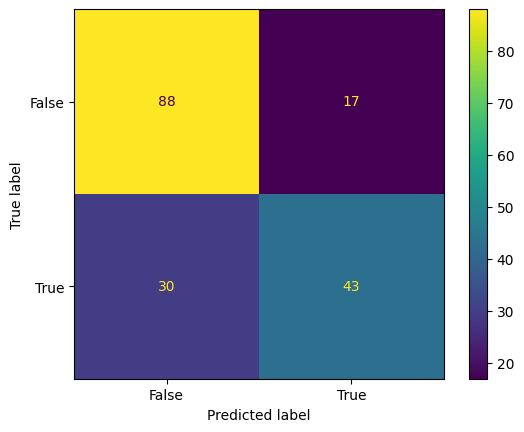

In [24]:
confusion_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)

cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = [False, True])

cm_display_knn.plot()
plt.show()

In [25]:
confusion_matrix_knn

array([[88, 17],
       [30, 43]], dtype=int64)

In [26]:
knn_Accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print(knn_Accuracy)
knn_Precision = metrics.precision_score(y_test, y_pred_knn)
print(knn_Precision)
knn_Sensitivity_recall = metrics.recall_score(y_test, y_pred_knn)
print(knn_Sensitivity_recall)
knn_F1_score = metrics.f1_score(y_test, y_pred_knn)
print(knn_F1_score)

0.7359550561797753
0.7166666666666667
0.589041095890411
0.6466165413533834


In [27]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtclassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
y_pred_dt=dtclassifier.predict(x_test)
y_pred_dt

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [29]:
confusion_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
confusion_matrix_dt

array([[88, 17],
       [25, 48]], dtype=int64)

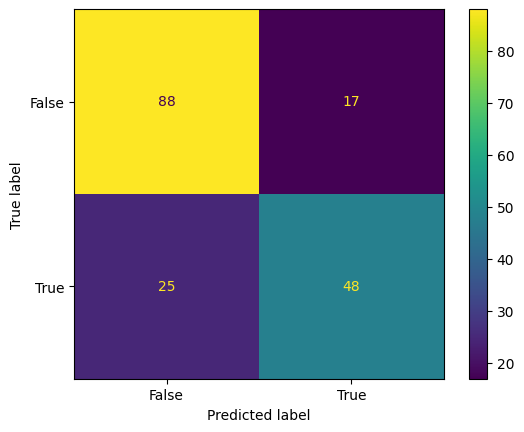

In [30]:
cm_display_dt = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt, display_labels = [False, True])

cm_display_dt.plot()
plt.show()

In [31]:
dt_Accuracy = metrics.accuracy_score(y_test, y_pred_dt)
print(dt_Accuracy)
dt_Precision = metrics.precision_score(y_test, y_pred_dt)
print(dt_Precision)
dt_Sensitivity_recall = metrics.recall_score(y_test, y_pred_dt)
print(dt_Sensitivity_recall)
dt_F1_score = metrics.f1_score(y_test, y_pred_dt)
print(dt_F1_score)

0.7640449438202247
0.7384615384615385
0.6575342465753424
0.6956521739130435


In [32]:
from sklearn.svm import SVC
classifier_linear=SVC(kernel='linear',random_state=1)
classifier_linear.fit( x_train,y_train)

SVC(kernel='linear', random_state=1)

In [33]:
y_pred_linear=classifier_linear.predict(x_test)
y_pred_linear

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

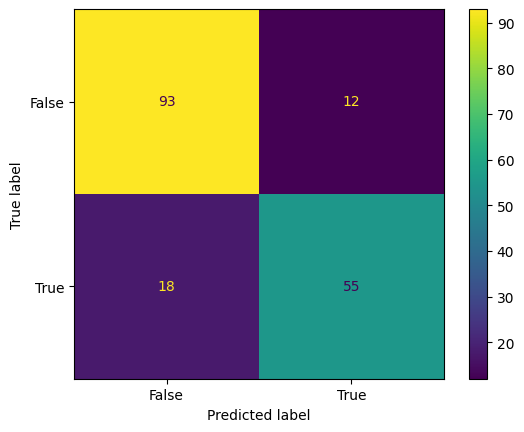

In [34]:
confusion_matrix_linear = metrics.confusion_matrix(y_test, y_pred_linear)

cm_display_linear = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_linear, display_labels = [False, True])

cm_display_linear.plot()
plt.show()

In [35]:
linear_Accuracy = metrics.accuracy_score(y_test, y_pred_linear)
print(linear_Accuracy)
linear_Precision = metrics.precision_score(y_test, y_pred_linear)
print(linear_Precision)
linear_Sensitivity_recall = metrics.recall_score(y_test, y_pred_linear)
print(linear_Sensitivity_recall)
linear_F1_score = metrics.f1_score(y_test, y_pred_linear)
print(linear_F1_score)

0.8314606741573034
0.8208955223880597
0.7534246575342466
0.7857142857142858


In [36]:
confusion_matrix_linear

array([[93, 12],
       [18, 55]], dtype=int64)

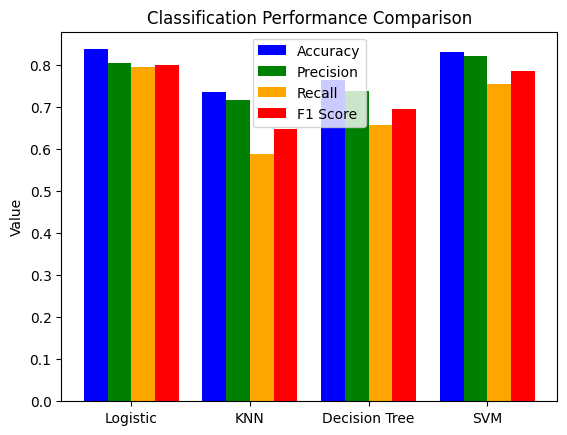

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated metrics for each KNN method (methods A, B, and C)
# Replace these with your actual metrics
methods = ['Logistic', 'KNN', 'Decision Tree','SVM']
accuracy = [0.8370786516853933,0.7359550561797753,0.7640449438202247,0.8314606741573034]
precision = [0.8055555555555556,0.7166666666666667,0.7384615384615385,0.8208955223880597]
recall = [0.7945205479452054,0.589041095890411,0.6575342465753424,0.7534246575342466]
f1_score = [0.8,0.6466165413533834,0.6956521739130435,0.7857142857142858]

# Set the bar width and positions
bar_width = 0.2
x = np.arange(len(methods))

# Create the grouped bar graph
plt.bar(x - 1.5 * bar_width, accuracy, bar_width, label='Accuracy', color='blue')
plt.bar(x - 0.5 * bar_width, precision, bar_width, label='Precision', color='green')
plt.bar(x + 0.5 * bar_width, recall, bar_width, label='Recall', color='orange')
plt.bar(x + 1.5 * bar_width, f1_score, bar_width, label='F1 Score', color='red')

# Set x-axis labels, y-axis label, and title
plt.xticks(x, methods)
plt.ylabel('Value')
plt.title('Classification Performance Comparison')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(n_estimators = 100,random_state=0)
rd.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [40]:
y_pred_rd=rd.predict(x_test)
y_pred_rd

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [47]:
cm=metrics.confusion_matrix(y_test,y_pred_rd)
print(cm)

[[92 13]
 [19 54]]


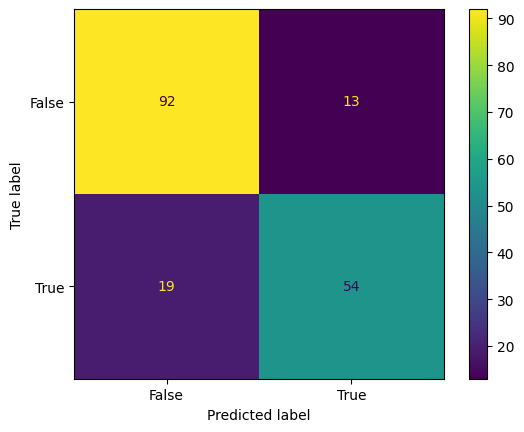

In [49]:
confusion_matrix_rd = metrics.confusion_matrix(y_test, y_pred_rd)

cm_display_rd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rd, display_labels = [False, True])

cm_display_rd.plot()
plt.show()